In [1]:
import polars as pl
import numpy as np

# 读取数据
data = pl.read_parquet("daily_data.pa")

df = data.sort('open_time').sort("symbol")

df = df.with_columns([
    (pl.col('quote_volume') - pl.col('taker_buy_quote_volume')).alias('taker_sell_quote_volume'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

N = 25

df = df.with_columns([
    pl.col('taker_buy_quote_volume').rolling_sum(N).over('symbol').alias('taker_buy_quote_volume_sum'),
    pl.col('taker_sell_quote_volume').rolling_sum(N).over('symbol').alias('taker_sell_quote_volume_sum'),
])

df = df.with_columns([
    (pl.col('taker_buy_quote_volume_sum') - pl.col('taker_sell_quote_volume_sum')).alias('net_taker_quote_volume'),
    (pl.col('taker_buy_quote_volume_sum') + pl.col('taker_sell_quote_volume_sum')).alias('total_taker_quote_volume'),
    (pl.col('taker_buy_quote_volume_sum') / pl.col('taker_sell_quote_volume_sum')).alias('quotient_taker_quote_volume'),
    (pl.col('taker_buy_quote_volume_sum') * pl.col('taker_sell_quote_volume_sum')).alias('product_taker_quote_volume')
])

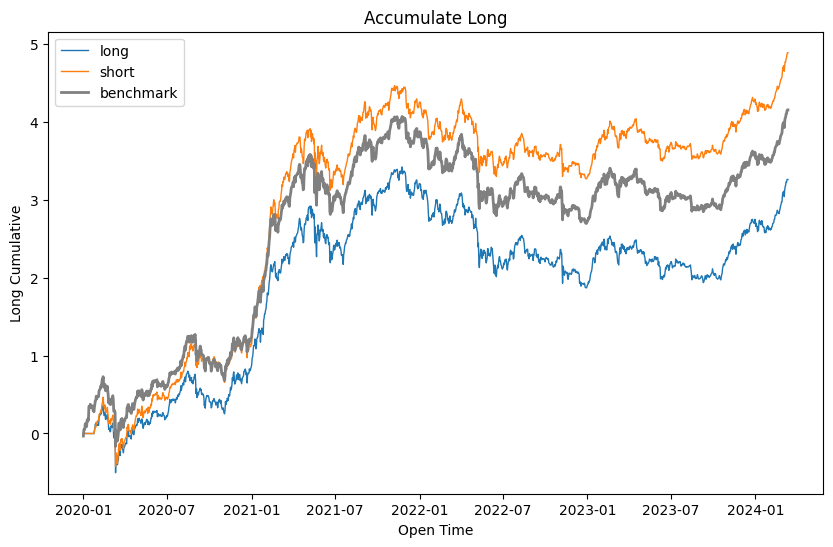

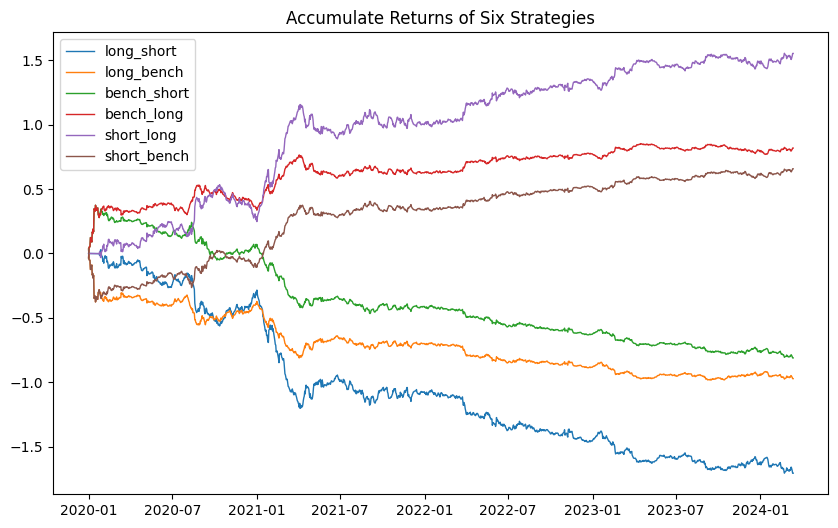

long: 
ann_return = 18.6338  sharpe = 4.1136  maxdd = 0.6345  calmar_ratio = 29.3691  

short: 
ann_return = 27.9375  sharpe = 6.162  maxdd = 0.603  calmar_ratio = 46.3301  

bench: 
ann_return = 23.7448  sharpe = 5.2089  maxdd = 0.5174  calmar_ratio = 45.8928  

long_short: 
ann_return = -9.7417  sharpe = -7.6496  maxdd = 1.6846  calmar_ratio = -5.7829  

long_bench: 
ann_return = -5.549  sharpe = -6.2248  maxdd = 0.9823  calmar_ratio = -5.6492  

bench_long: 
ann_return = 4.673  sharpe = 5.2421  maxdd = 0.1277  calmar_ratio = 36.591  

short_long: 
ann_return = 8.8657  sharpe = 6.9617  maxdd = 0.1867  calmar_ratio = 47.4942  

short_bench: 
ann_return = 3.7547  sharpe = 4.0668  maxdd = 0.3965  calmar_ratio = 9.4686  

bench_short: 
ann_return = -4.6307  sharpe = -5.0156  maxdd = 0.862  calmar_ratio = -5.3719  



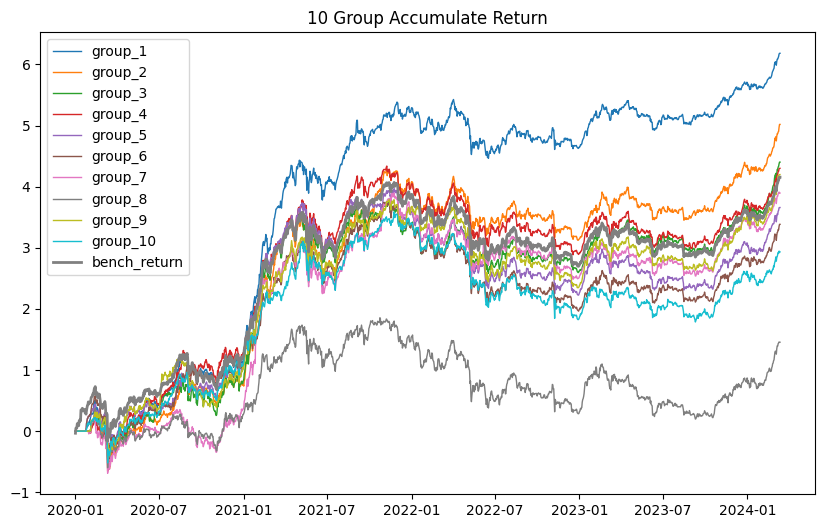

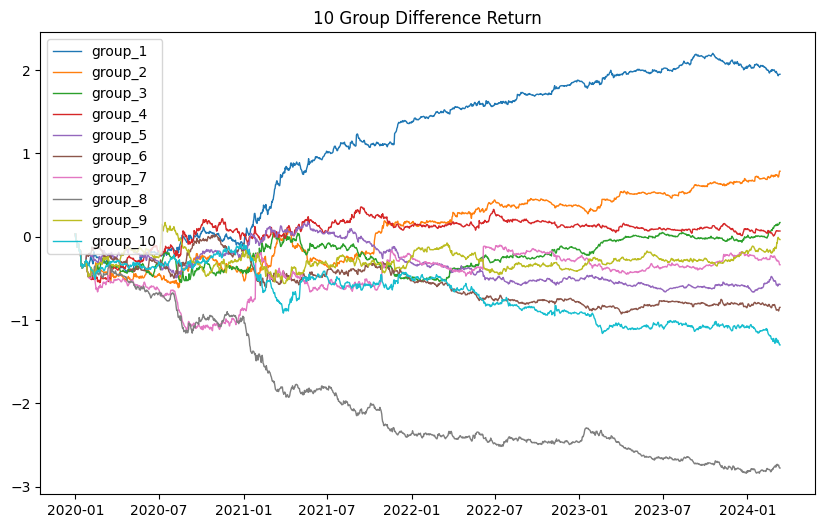

group_1: 
ann_return = 35.3316  sharpe = 7.8458  maxdd = 0.6515  calmar_ratio = 54.2288  

group_2: 
ann_return = 28.6813  sharpe = 5.958  maxdd = 0.7146  calmar_ratio = 40.1372  

group_3: 
ann_return = 25.1572  sharpe = 5.3346  maxdd = 0.5745  calmar_ratio = 43.7885  

group_4: 
ann_return = 24.5757  sharpe = 5.1547  maxdd = 0.7354  calmar_ratio = 33.4172  

group_5: 
ann_return = 20.9088  sharpe = 4.439  maxdd = 0.569  calmar_ratio = 36.7483  

group_6: 
ann_return = 19.3379  sharpe = 4.0244  maxdd = 0.6304  calmar_ratio = 30.6733  

group_7: 
ann_return = 22.2607  sharpe = 4.3404  maxdd = 0.7409  calmar_ratio = 30.0467  

group_8: 
ann_return = 8.3138  sharpe = 1.7893  maxdd = 0.7075  calmar_ratio = 11.7516  

group_9: 
ann_return = 23.9897  sharpe = 4.9812  maxdd = 0.5747  calmar_ratio = 41.7411  

group_10: 
ann_return = 16.7597  sharpe = 3.746  maxdd = 0.606  calmar_ratio = 27.6583  

-----------------------------------------
group_difference_1: 
ann_return = 11.1488  sharpe = 6

In [2]:
factors = df.select(['open_time', 'symbol', 'product_taker_quote_volume'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()